In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('quora_data1.csv')

In [5]:
df

,question_text,target
0,Could I walk down the street naked as long as ...,0
1,Why is the BJP hell bent on destroying the san...,1
2,Can a firm sign away its right to enter Chapte...,0
3,Why do Youth of India want to Join Indian Arme...,0
4,How 911 14 hijackers have Saudi passports & 5 ...,1
...,...,...
170213,Do religious homophobes who support Trump over...,1
170214,Why is someone always at the top of a friends ...,0
170215,Why wasn’t McCain held responsible for the mur...,1
170216,Why does “Winnie-The-Pooh” support North Korea?,1


In [6]:
input_data = df.question_text
target =  df.target

In [7]:
input_data

0         Could I walk down the street naked as long as ...
1         Why is the BJP hell bent on destroying the san...
2         Can a firm sign away its right to enter Chapte...
3         Why do Youth of India want to Join Indian Arme...
4         How 911 14 hijackers have Saudi passports & 5 ...
                                ...                        
170213    Do religious homophobes who support Trump over...
170214    Why is someone always at the top of a friends ...
170215    Why wasn’t McCain held responsible for the mur...
170216      Why does “Winnie-The-Pooh” support North Korea?
170217                                    What is the sbei?
Name: question_text, Length: 170218, dtype: object

In [8]:
target

0         0
1         1
2         0
3         0
4         1
         ..
170213    1
170214    0
170215    1
170216    1
170217    0
Name: target, Length: 170218, dtype: int64

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer()
input_data = vectorize.fit_transform(input_data.astype('U'))
input_data

AttributeError: lower not found

In [ ]:
input_data.shape

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target, test_size = 0.25, random_state = 0)

In [13]:
x_train.shape

(127663, 64660)

In [14]:
y_train.shape

(127663,)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [18]:
y_test = np.array(y_test)

In [19]:
y_test

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [20]:
count = 0
for i in range(len(y_test)):
    if y_test[i]==y_pred[i]:
        count+=1
print("Accuracy is:",count/(len(y_test))*100)

Accuracy is: 88.04370814240394


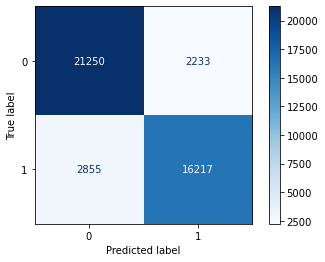

In [21]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
class_names = ['0','1']
disp = plot_confusion_matrix(classifier, x_test, y_test,display_labels = class_names,
                                 cmap=plt.cm.Blues)

plt.show()

In [22]:
import pickle
pickle.dump(classifier,open('Quora_Logistic_Exe_new.pkl','wb'))
Quora_Logistic_Exe_new = pickle.load(open('Quora_Logistic_Exe_new.pkl','rb'))